In [1]:
#example using model_alerting_and_performance_evaluation.py
#GOAL: bootstapped error bounds

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

In [3]:
%load_ext autoreload
%autoreload 1
%aimport model_alerting_and_performance_evaluation
mape = model_alerting_and_performance_evaluation

In [4]:
#need to generate data that has 4 columns:
# each row represents the output for a given patient enounter at a set time-step
# eID: encounterID - this is what groups a patient's encounter (encounter) together
# p: the probability (risk estimate) for each encounter time-step
# y: the true label for that encounter (assume that there's only 1 label fper encounter)
# observer: the observer who would see an alert for that given encounter time-step (e.g. the primary contact physician)

# assumes that data are in ascending temporal order
# assumes one there's one observer per encounter time-step

#TODOS:
# add time-step functionality
# assumes 

# simulate data

In [5]:
#generate underlying risk (p)
rng = np.random.default_rng()
n = 200

p = rng.uniform(size=n)
y = rng.binomial(1, p)

l = rng.integers(2, 10, size=n)
n_t = sum(l)

e_t = rng.normal(0.0, 0.1, size=n_t)

In [6]:
#generate risk estimates for every encounter time-step
ci = []
cp = []
co = []
cy = []

n_obs = 3

for i, p_i in enumerate(p):
    _l = rng.integers(2,10)
    e_t = rng.normal(0.0, 0.1, size=_l)
    
    ci += [i]*_l
    cp += list(p_i + e_t.cumsum())
    cy += [y[i]]*_l
    
    o_i = [i]*_l
    o_i_mod = rng.binomial(1, 0.1, size=_l).cumsum()
    o_i += o_i_mod
    o_i = o_i%n_obs
    
    co += list(o_i)

In [7]:
# turn it into a dataframe with the following columns: 'eID', 'p', 'y', 'observer'
df = pd.DataFrame({'eID':ci, 'p':cp, 'y': cy, 'observer':co})
df.head()

,eID,p,y,observer
0,0,1.117768,1,0
1,0,1.256433,1,1
2,0,1.293199,1,1
3,0,1.343813,1,1
4,1,0.948238,1,1


# overall performance

In [8]:
_ = df.groupby(by='eID').max()
metrics.roc_auc_score(_['y'], _['p'])

0.7875689223057645

# compute alerts and performance

In [9]:
ap_res, oc_res = mape.compute_alerts_and_performance(df, return_oc_res=True, tau_on_percentile=True)
ap_res.head()

,tau,tn,fp,fn,tp,oa_max,oa_min,oa_mean,oa_med,oa_sum,sens,spec,ppv,npv,proportion_unalerted
0,0.000000,0,105,0,95,70,64,66.666667,66.0,200,1.000000,0.000000,0.475000,NaN,0.000
1,0.041667,0,105,0,95,70,64,66.666667,66.0,200,1.000000,0.000000,0.475000,NaN,0.000
2,0.083333,3,102,1,94,67,63,65.333333,66.0,196,0.989474,0.028571,0.479592,0.750000,0.020
3,0.125000,12,93,1,94,64,60,62.333333,63.0,187,0.989474,0.114286,0.502674,0.923077,0.065
4,0.166667,17,88,3,92,61,59,60.000000,60.0,180,0.968421,0.161905,0.511111,0.850000,0.100


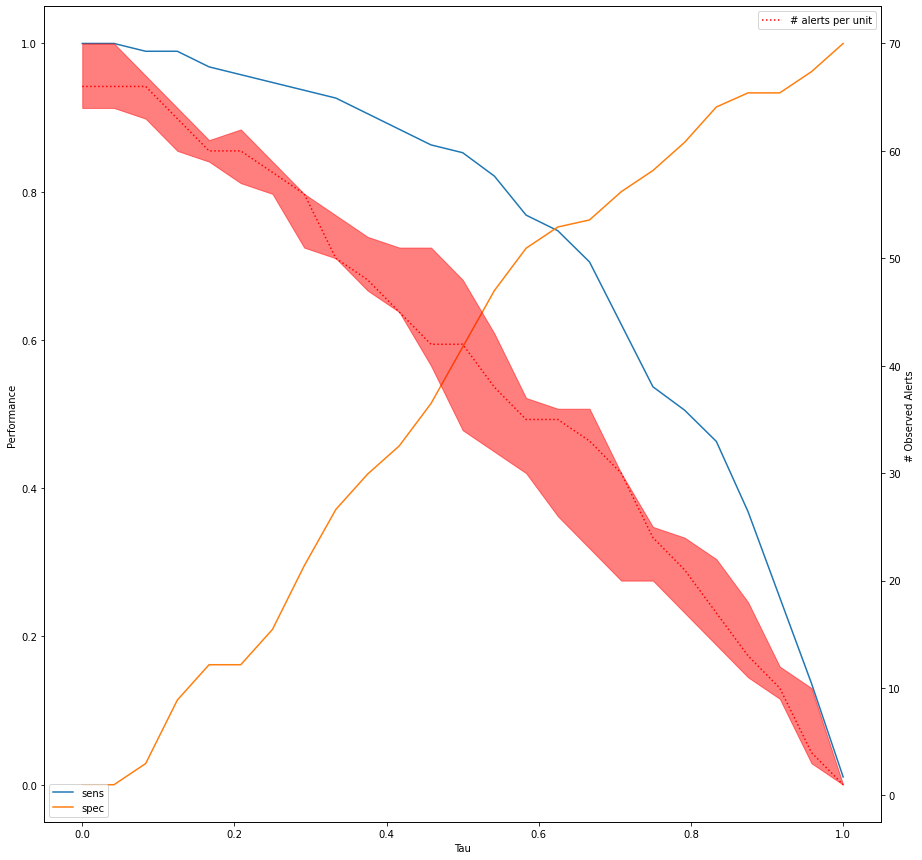

In [10]:
mape.plot_alerts_and_performance(ap_res)

In [11]:
ap_res

,tau,tn,fp,fn,tp,oa_max,oa_min,oa_mean,oa_med,oa_sum,sens,spec,ppv,npv,proportion_unalerted
0,0.000000,0,105,0,95,70,64,66.666667,66.0,200,1.000000,0.000000,0.475000,NaN,0.000
1,0.041667,0,105,0,95,70,64,66.666667,66.0,200,1.000000,0.000000,0.475000,NaN,0.000
2,0.083333,3,102,1,94,67,63,65.333333,66.0,196,0.989474,0.028571,0.479592,0.750000,0.020
3,0.125000,12,93,1,94,64,60,62.333333,63.0,187,0.989474,0.114286,0.502674,0.923077,0.065
4,0.166667,17,88,3,92,61,59,60.000000,60.0,180,0.968421,0.161905,0.511111,0.850000,0.100
5,0.208333,17,88,4,91,62,57,59.666667,60.0,179,0.957895,0.161905,0.508380,0.809524,0.105
6,0.250000,22,83,5,90,59,56,57.666667,58.0,173,0.947368,0.209524,0.520231,0.814815,0.135
7,0.291667,31,74,6,89,56,51,54.333333,56.0,163,0.936842,0.295238,0.546012,0.837838,0.185
8,0.333333,39,66,7,88,54,50,51.333333,50.0,154,0.926316,0.371429,0.571429,0.847826,0.230
9,0.375000,44,61,9,86,52,47,49.000000,48.0,147,0.905263,0.419048,0.585034,0.830189,0.265


In [12]:
'''def plot_gain(ap_res,
              alpha=np.expand_dims(np.linspace(0.1,0.3, 5), axis=1), 
              kappa = 10000,
              beta = 20):
    
    #alpha: effectiveness
    #kappa: cost of CDI
    #beta: intervention cost
    
    n_intervene = np.expand_dims((ap_res['tp']+ap_res['fp']).values, axis=0)
    n_intervene_pos = np.expand_dims((ap_res['tp']).values, axis=0)
    v = alpha*kappa*n_intervene_pos - beta*n_intervene

    for i,_a in enumerate(alpha):
        plt.plot(list(ap_res['tau']), v[i], label='alpha={}'.format(_a[0]))

    plt.xlabel('tau')
    plt.ylabel('Gain')
    plt.legend()
    plt.show()'''


def plot_alerts_and_incidence_reduction(ap_res, performance_measures=['sens', 'spec']):
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    for m in performance_measures:
        ax1.plot(ap_res['tau'], ap_res[m], label=m)


    ax2.plot(ap_res['tau'], ap_res['oa_med'], ':', color='r', label='# alerts per unit')
    ax2.fill_between(ap_res['tau'], ap_res['oa_max'], ap_res['oa_min'], color='r', alpha=0.5,)

    ax1.set_xlabel('Tau')
    ax1.set_ylabel('Performance')
    ax2.set_ylabel('# Observed Alerts ')

    ax1.legend(loc='lower left')
    ax2.legend(loc='upper right')

    plt.show()

# tradeoff

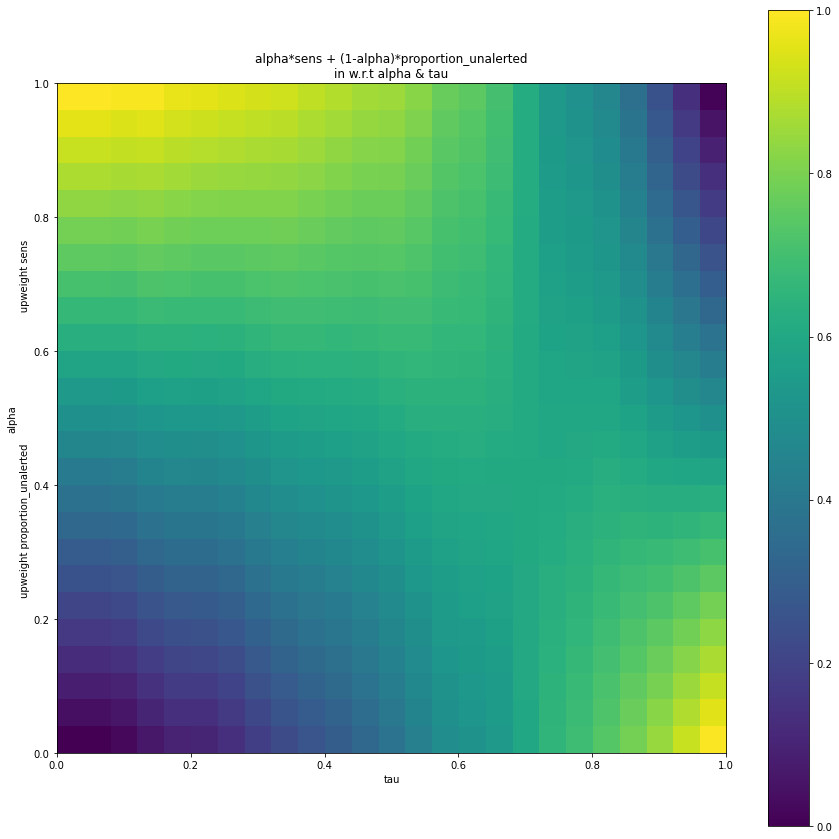

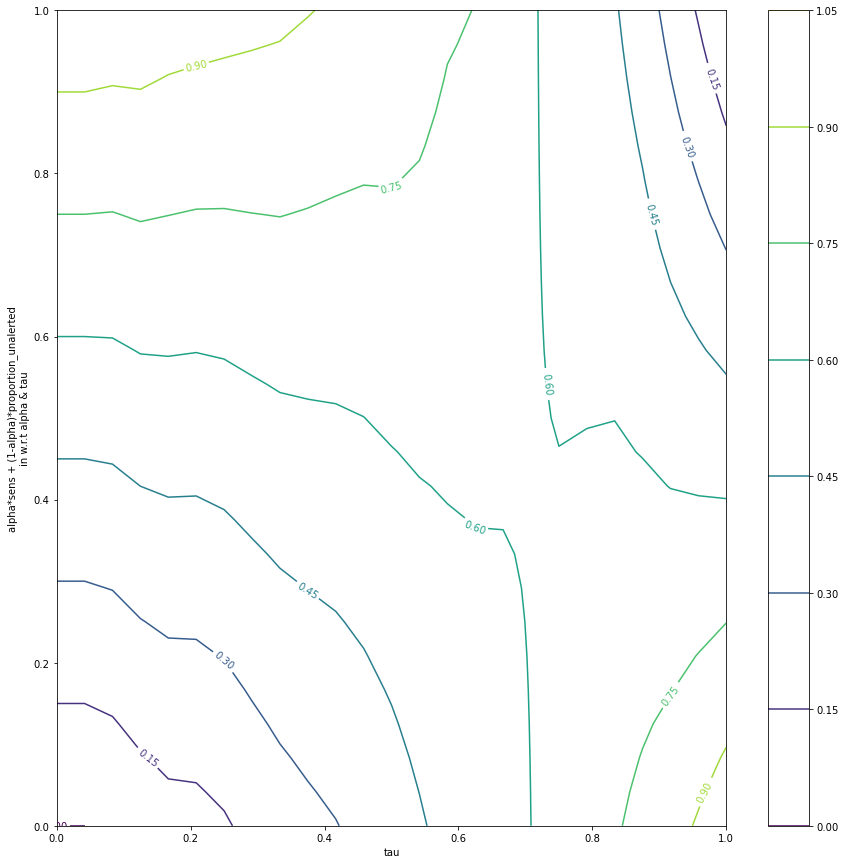

In [13]:
mape.plot_trade_off(ap_res)

# gain

In [14]:
ap_res.head()

,tau,tn,fp,fn,tp,oa_max,oa_min,oa_mean,oa_med,oa_sum,sens,spec,ppv,npv,proportion_unalerted
0,0.000000,0,105,0,95,70,64,66.666667,66.0,200,1.000000,0.000000,0.475000,NaN,0.000
1,0.041667,0,105,0,95,70,64,66.666667,66.0,200,1.000000,0.000000,0.475000,NaN,0.000
2,0.083333,3,102,1,94,67,63,65.333333,66.0,196,0.989474,0.028571,0.479592,0.750000,0.020
3,0.125000,12,93,1,94,64,60,62.333333,63.0,187,0.989474,0.114286,0.502674,0.923077,0.065
4,0.166667,17,88,3,92,61,59,60.000000,60.0,180,0.968421,0.161905,0.511111,0.850000,0.100


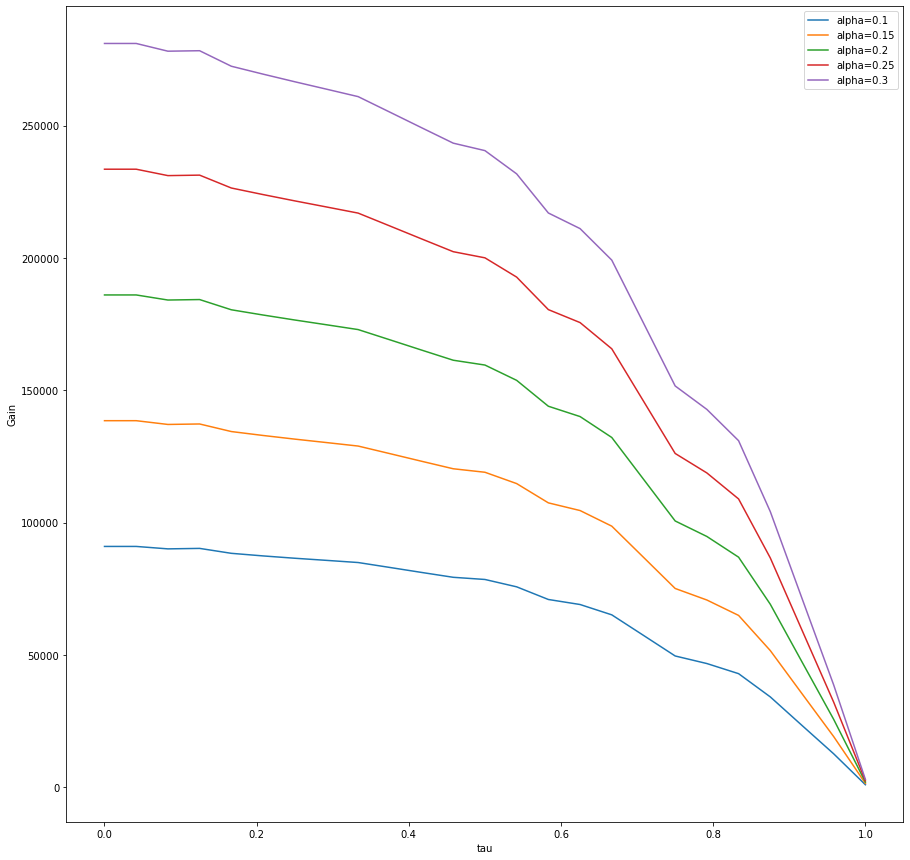

In [15]:
mape.plot_gain(ap_res)

## new overall performance plot

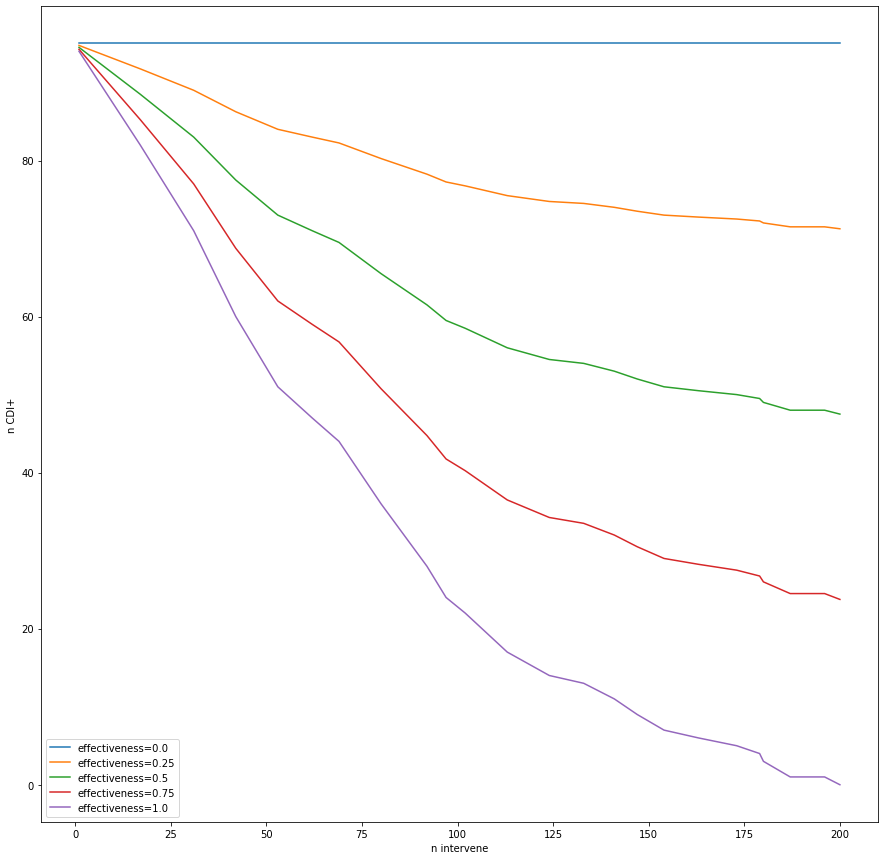

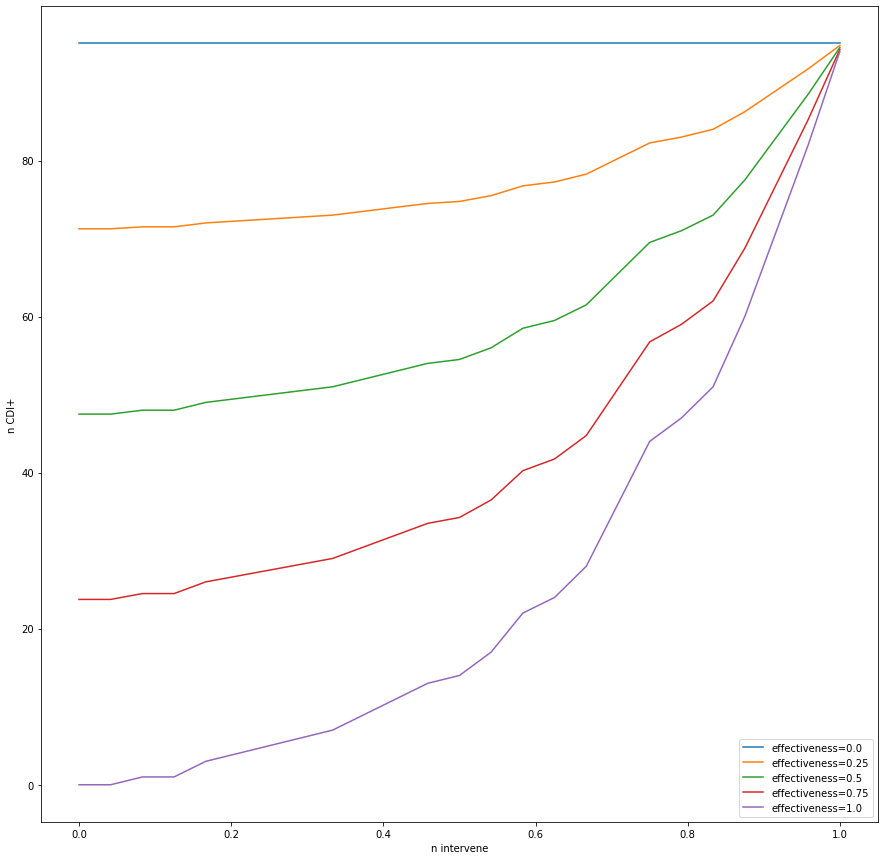

In [16]:
_ = mape.plot_effectiveness(ap_res)

# bootstrapping

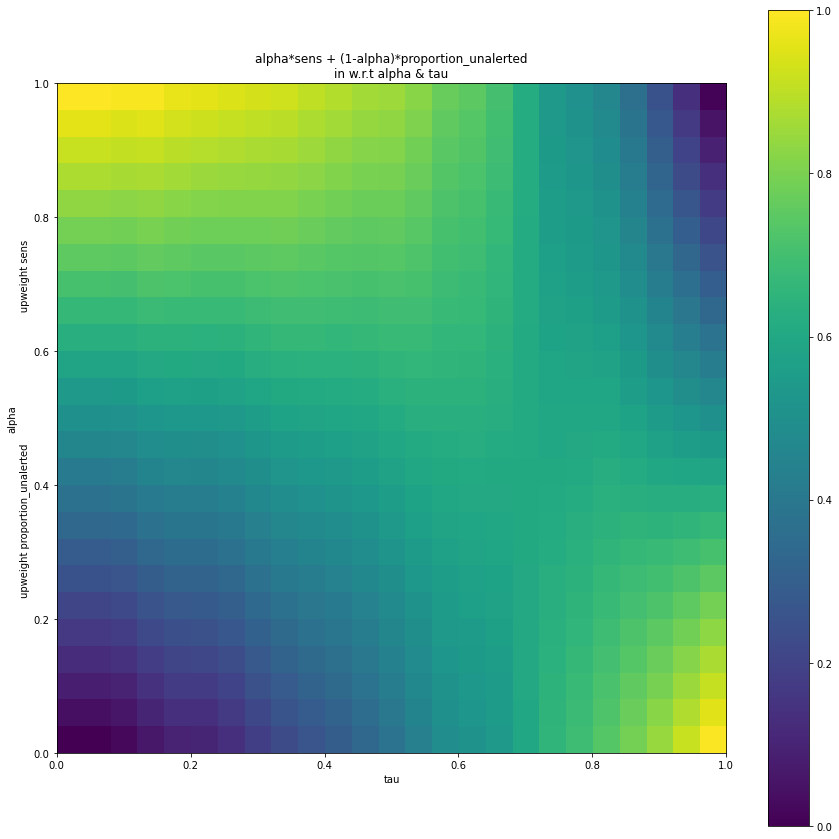

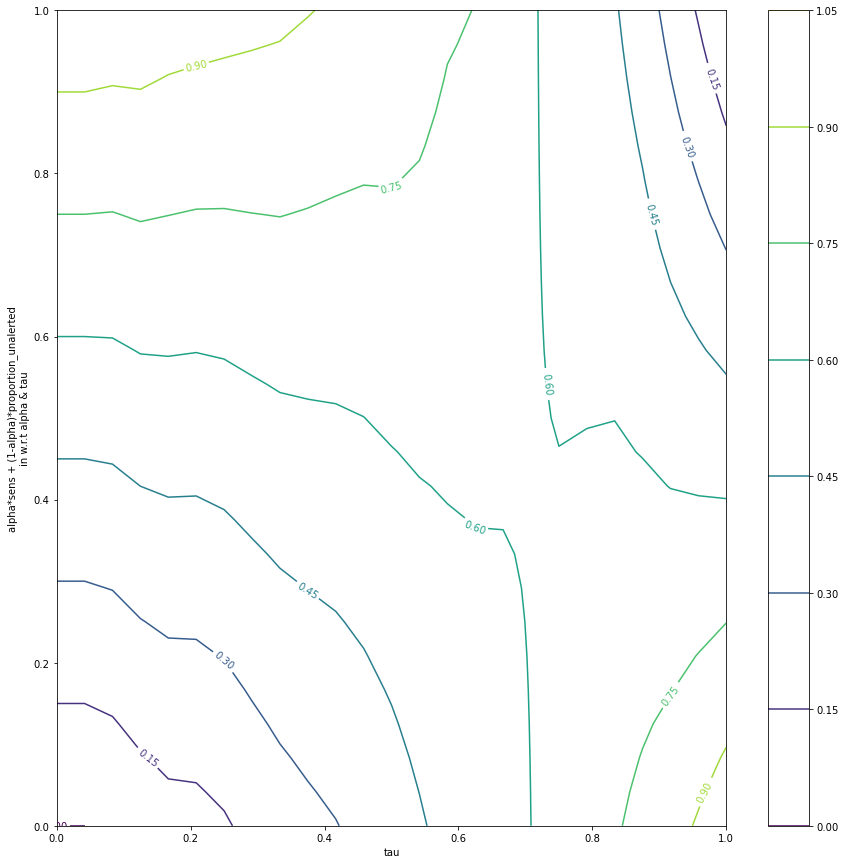

In [18]:
mape.plot_trade_off(ap_res)

In [22]:
ap_res, oc_res, bs_ap_res, bs_oc_res =\
mape.bs_compute_alerts_and_performance(df, bs_rep=2)

In [ ]:
ap_res

In [ ]:
oc_res

In [ ]:
bs_ap_res

In [ ]:
bs_oc_res

In [ ]:
def bs_plot_effectiveness(ap_res, bs_ap_res, 
                          e = np.expand_dims(np.linspace(0,1, 5), axis=1)):
    #e: effectiveness
    n_intervene = np.expand_dims((ap_res['tp']+ap_res['fp']).values, axis=0)
    n_intervene_pos = np.expand_dims((ap_res['tp']).values, axis=0)
    n_pos = np.expand_dims((ap_res['tp'] + ap_res['fn']).values, axis=0)

    v = n_pos - (e*n_intervene_pos)


    _bs_ap_res = bs_ap_res.copy(deep=True)
    _bs_ap_res['n_intervene'] = _bs_ap_res['tp']+bs_ap_res['fp']
    _bs_ap_res['n_intervene_pos'] = _bs_ap_res['tp']
    _bs_ap_res['n_pos'] = _bs_ap_res['tp'] + _bs_ap_res['fn']


    for i,_e in enumerate(e):
        #plt.plot(n_intervene[0], v[i], label='effectiveness={}'.format(_e[0]))

        x = n_intervene[0]
        y = v[i]

        _bs_ap_res['v'] = _bs_ap_res['n_pos'] - _e*_bs_ap_res['n_intervene_pos']
        _ = _bs_ap_res.groupby(by=['tau'])[['n_intervene', 'v']].describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975])
        x_lb = _[('n_intervene', '2.5%')]
        x_ub = _[('n_intervene', '97.5%')]
        xerr = [x-x_lb, x_ub-x]

        y_lb = _[('v', '2.5%')]
        y_ub = _[('v', '97.5%')]
        yerr = [y-y_lb, y_ub-y]

        plt.errorbar(x, y, xerr=xerr, yerr=yerr, 
                     label='effectiveness={}'.format(_e[0]))

    plt.ylabel('n CDI+')
    plt.xlabel('n intervene')
    plt.legend()
    plt.show()

    for i,_e in enumerate(e):
        #plt.plot(list(ap_res['tau']), v[i], label='effectiveness={}'.format(_e[0]))
        
        x = list(ap_res['tau'])
        y = v[i]

        _bs_ap_res['v'] = _bs_ap_res['n_pos'] - _e*_bs_ap_res['n_intervene_pos']
        _ = _bs_ap_res.groupby(by=['tau'])[['n_intervene', 'v']].describe(percentiles=[0.025, 0.25, 0.5, 0.75, 0.975])

        y_lb = _[('v', '2.5%')]
        y_ub = _[('v', '97.5%')]
        yerr = [y-y_lb, y_ub-y]

        plt.errorbar(x, y, yerr=yerr, 
                     label='effectiveness={}'.format(_e[0]))
        

    plt.ylabel('n CDI+')
    plt.xlabel('n intervene')
    plt.legend()
    plt.show()

bs_plot_effectiveness(ap_res, bs_ap_res)

In [ ]:
# alerts

In [ ]:
oc_res